# Unveiling the Strength Spectrum: Exploring Gender Disparities in Powerlifting

## Observation of Data

### Import Libraries

In [22]:
#importing libraries to be used later for calculations and graphs.

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

### Read Data 

#### Importing CSV file into dataframe

In [23]:
# uplodaing data and displaying all columns 

df = pd.read_csv('/Users/Ethan/Documents/Portfolio/SQL Projects/Powerlifting/archive/openpowerlifting.csv', low_memory=False)
pd.set_option('display.max_columns', None)

#### Display first rows 

In [24]:
df.head(10)

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,105.0,NaN,105.0,45.0,50.0,55.0,NaN,55.0,110.0,120.0,130.0,NaN,130.0,290.0,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,120.0,NaN,120.0,55.0,62.5,67.5,NaN,67.5,130.0,140.0,145.0,NaN,145.0,332.5,2,378.07,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,NaN,32.5,NaN,NaN,NaN,NaN,NaN,32.5,1,38.56,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,105.0,NaN,105.0,67.5,72.5,-75.0,NaN,72.5,132.5,-140.0,-140.0,NaN,132.5,310.0,3,345.61,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,140.0,NaN,140.0,70.0,75.0,80.0,NaN,80.0,150.0,160.0,170.0,NaN,170.0,390.0,3,321.25,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
5,April Alvarez,F,SBD,Wraps,37.0,35-39,F-OR,74.0,75,127.5,135.0,142.5,NaN,142.5,72.5,77.5,82.5,NaN,82.5,125.0,135.0,145.0,NaN,145.0,370.0,5,354.74,354.74,312.20,596.18,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
6,Ash Morgan,F,SBD,Wraps,23.0,20-23,F-OR,59.8,60,115.0,125.0,-135.0,NaN,125.0,65.0,70.0,-75.0,NaN,70.0,130.0,140.0,150.0,NaN,150.0,345.0,1,385.63,385.63,340.74,612.23,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
7,Belinda Moloney,F,SBD,Wraps,35.0,35-39,F-OR,80.4,82.5,120.0,130.0,140.0,NaN,140.0,67.5,72.5,77.5,NaN,77.5,125.0,140.0,152.5,NaN,152.5,370.0,5,337.62,337.62,296.00,575.85,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
8,Briony Williams,F,SBD,Wraps,36.0,35-39,F-OR,108.0,110,180.0,200.0,220.0,NaN,220.0,90.0,100.0,NaN,NaN,100.0,200.0,NaN,NaN,NaN,200.0,520.0,1,424.49,424.49,361.57,716.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
9,Brooke Kowalczyk,F,SBD,Wraps,37.0,35-39,F-OR,74.8,75,180.0,190.0,200.0,NaN,200.0,90.0,95.0,-97.5,NaN,95.0,160.0,170.0,180.0,NaN,180.0,475.0,1,452.31,452.31,397.92,762.42,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


#### Describe

In [25]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.

df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
count,757527.000000,1.406622e+06,337580.000000,333349.000000,323842.000000,3696.000000,1.031450e+06,499779.000000,493486.000000,478485.000000,9505.000000,1.276181e+06,363544.000000,356023.000000,339947.000000,9246.000000,1.081808e+06,1.313184e+06,1.304407e+06,1.304254e+06,1.304407e+06,1.273286e+06
mean,31.501570,8.422503e+01,114.102442,92.155846,30.056842,71.356870,1.740049e+02,83.892373,55.065745,-18.520481,24.845638,1.165444e+02,162.700840,130.228378,12.995484,78.914945,1.872585e+02,3.956148e+02,2.882247e+02,2.960682e+02,2.718484e+02,4.854330e+02
std,13.371707,2.322011e+01,147.143021,173.701524,200.413385,194.522045,6.923931e+01,105.196350,130.302229,144.225726,165.628325,5.483622e+01,108.681438,162.680134,215.052488,192.605159,6.232821e+01,2.011420e+02,1.231805e+02,1.249700e+02,1.175571e+02,1.133489e+02
min,0.000000,1.510000e+01,-555.000000,-580.000000,-600.500000,-550.000000,-4.775000e+02,-480.000000,-507.500000,-575.000000,-500.000000,-5.225000e+02,-461.000000,-470.000000,-587.500000,-461.000000,-4.100000e+02,2.500000e+00,1.470000e+00,1.470000e+00,1.410000e+00,2.160000e+00
25%,21.000000,6.670000e+01,90.000000,68.000000,-167.500000,-107.840000,1.224700e+02,57.500000,-52.500000,-140.000000,-127.500000,7.484000e+01,125.000000,115.000000,-210.000000,-110.000000,1.383500e+02,2.325000e+02,1.979000e+02,2.048200e+02,1.828100e+02,4.028600e+02
50%,28.000000,8.180000e+01,147.500000,145.000000,110.000000,135.000000,1.678300e+02,105.000000,95.000000,-60.000000,77.500000,1.111300e+02,180.000000,177.500000,117.500000,145.150000,1.850000e+02,3.787500e+02,3.052000e+02,3.120300e+02,2.859400e+02,4.780500e+02
75%,40.000000,9.915000e+01,200.000000,205.000000,192.500000,205.000000,2.175000e+02,145.000000,145.000000,117.500000,157.500000,1.500000e+02,226.800000,230.000000,205.000000,210.000000,2.300000e+02,5.400000e+02,3.745600e+02,3.837600e+02,3.552800e+02,5.597000e+02
max,97.000000,2.580000e+02,555.000000,566.990000,560.000000,505.500000,5.750000e+02,467.500000,487.500000,478.540000,487.610000,4.885000e+02,450.000000,460.400000,457.500000,418.000000,5.850000e+02,1.367500e+03,7.793800e+02,8.044000e+02,7.429600e+02,1.245930e+03


#### Shape

In [26]:
#Dimensionality of array

df.shape

(1423354, 37)

#### Drop NA results 

In [27]:
df.dropna()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
63986,Kylie Beutler,F,SBD,Wraps,23.0,20-23,Juniors 20-23,56.00,56,83.91,92.99,97.52,102.06,97.52,54.43,61.23,65.77,-70.31,65.77,111.13,120.20,124.74,-133.81,124.74,288.03,1,338.90,338.90,299.77,523.61,Yes,USA,WPA,2011-05-21,USA,CA,World Championships
66457,Kaitlynn Naert,F,SBD,Wraps,13.0,13-15,Teen 13-15,103.69,90+,43.09,61.23,81.65,90.72,81.65,34.02,40.82,47.63,-54.43,47.63,102.06,108.86,120.20,124.74,120.20,249.48,1,205.66,263.24,175.84,359.25,Yes,USA,APA,2015-09-19,USA,MI,Wolverine Open
67030,Carol Moorhead,F,SBD,Wraps,55.0,55-59,Open,74.39,75,79.38,83.91,88.45,90.72,88.45,43.09,45.36,47.63,49.90,47.63,88.45,92.99,97.52,102.06,97.52,233.60,1,223.22,273.44,196.41,374.65,Yes,USA,APA,2017-04-22,USA,MO,ShowMe State Raw Championships
67031,Nancy Lowther,F,SBD,Wraps,58.0,55-59,Open,87.09,90,90.72,102.06,111.13,113.40,111.13,61.23,65.77,70.31,72.57,70.31,102.06,111.13,115.67,120.20,115.67,297.10,1,260.41,336.19,227.02,449.73,Yes,USA,APA,2017-04-22,USA,MO,ShowMe State Raw Championships
69557,Roger Shaw,M,SBD,Wraps,73.0,70-74,Masters 70-79,74.12,75,147.42,156.49,163.29,168.74,163.29,81.65,86.18,88.45,90.72,88.45,167.83,176.90,181.44,184.16,181.44,433.18,1,311.23,546.53,301.14,443.10,Yes,USA,APA,2018-11-17,USA,MO,Midwest Raw Championships
646493,Ryan Lapadat,M,SBD,Raw,26.0,24-34,Open,81.70,82.5,142.50,157.50,165.00,172.50,165.00,132.50,137.40,145.00,150.00,145.00,192.50,197.50,205.00,210.00,205.00,515.00,1,347.04,347.04,335.10,505.60,Yes,Canada,CPO,2008-05-17,Canada,ON,Canadian Championships
646495,Denis Pronin,M,SBD,Multi-ply,20.0,20-23,Juniors 20-23,76.30,82.5,125.00,135.00,145.00,147.50,145.00,137.50,-147.50,147.50,155.00,147.50,135.00,142.50,152.50,160.00,152.50,445.00,1,313.37,322.77,303.01,411.52,Yes,Canada,CPO,2008-05-17,Canada,ON,Canadian Championships
652230,Brooke Zak,F,SBD,Raw,12.5,13-15,Teen 12-13,44.54,48,40.00,45.00,52.50,55.00,52.50,22.00,30.00,32.50,35.00,32.50,62.50,65.50,75.00,77.50,75.00,160.00,1,223.45,286.01,200.16,303.20,Yes,USA,RAW,2018-11-09,USA,NC,OBX Open
658136,Brooke Zak,F,SBD,Raw,12.0,5-12,Teen 12-13,43.27,44,37.50,45.00,52.50,-53.50,52.50,20.00,30.00,32.50,33.50,32.50,57.50,70.00,80.00,-82.50,80.00,165.00,1,234.91,312.43,211.11,318.59,Yes,USA,RAW,2018-08-03,USA,NC,Southern Open
658137,Brooke Zak,F,SBD,Raw,12.0,5-12,Open,43.27,44,37.50,45.00,52.50,-53.50,52.50,20.00,30.00,32.50,33.50,32.50,57.50,70.00,80.00,-82.50,80.00,165.00,1,234.91,312.43,211.11,318.59,Yes,USA,RAW,2018-08-03,USA,NC,Southern Open


## Male and Female Competitors

### Number of Participants

In [28]:
num_males = (df['Sex'] == 'M').sum()
num_females = (df['Sex'] == 'F').sum()
participants = (df['Sex'] == 'F').count()

### Participants Percentage // Donut Chart

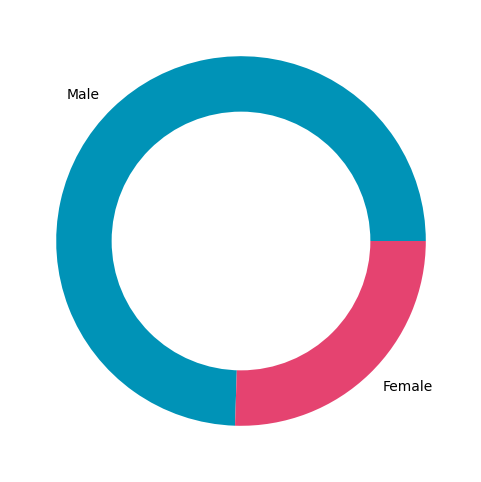

Male Competetor Percentage
74 %

Female Competetor Percentage
26 %


In [29]:
# Pie chart of males and female competitors
x = np.array([num_males,num_females])
genders = ["Male","Female"]

plt.pie(x, labels=genders, colors = ['#0093b7','#e54370'])
donut = plt.Circle ((0,0), 0.70, fc='white')

fig = plt.gcf()
fig.gca().add_artist(donut)
fig.set_size_inches(6,6)

plt.show()

print("Male Competetor Percentage")
print(round((num_males/participants)*100),"%")
print()
print("Female Competetor Percentage")
print(round((num_females/participants)*100),"%")

## Gender and Age Inquiry 

### New Age Category Column Function

In [30]:
def find_age_class(x):
    if x < 10:
        return "0-10"
    if x >= 10 and x < 20:
        return "10-20"
    if x >= 20 and x < 30:
        return "20-30"
    if x >= 30 and x < 40:
        return "30-40"
    if x >= 40 and x < 50:
        return "40-50"
    if x >= 50 and x < 60:
        return "50-60"
    if x >= 60:
        return "60+"

In [31]:
df['Adjusted Age Class'] = pd.DataFrame(df.Age.apply(lambda x: find_age_class(x)))

In [32]:
female_lifters = df.query("Sex == 'F'")
male_lifters = df.query("Sex == 'M'")

### Lifting Ratio

In [33]:
female_lifters['lift_ratio'] = female_lifters['TotalKg']/female_lifters['BodyweightKg']

male_lifters['lift_ratio'] = male_lifters['TotalKg']/male_lifters['BodyweightKg']

C:\Users\Ethan\AppData\Local\Temp\ipykernel_22116\3680883712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_lifters['lift_ratio'] = female_lifters['TotalKg']/female_lifters['BodyweightKg']
C:\Users\Ethan\AppData\Local\Temp\ipykernel_22116\3680883712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_lifters['lift_ratio'] = male_lifters['TotalKg']/male_lifters['BodyweightKg']


### Female Average Lifts by Age & Lift Ratio

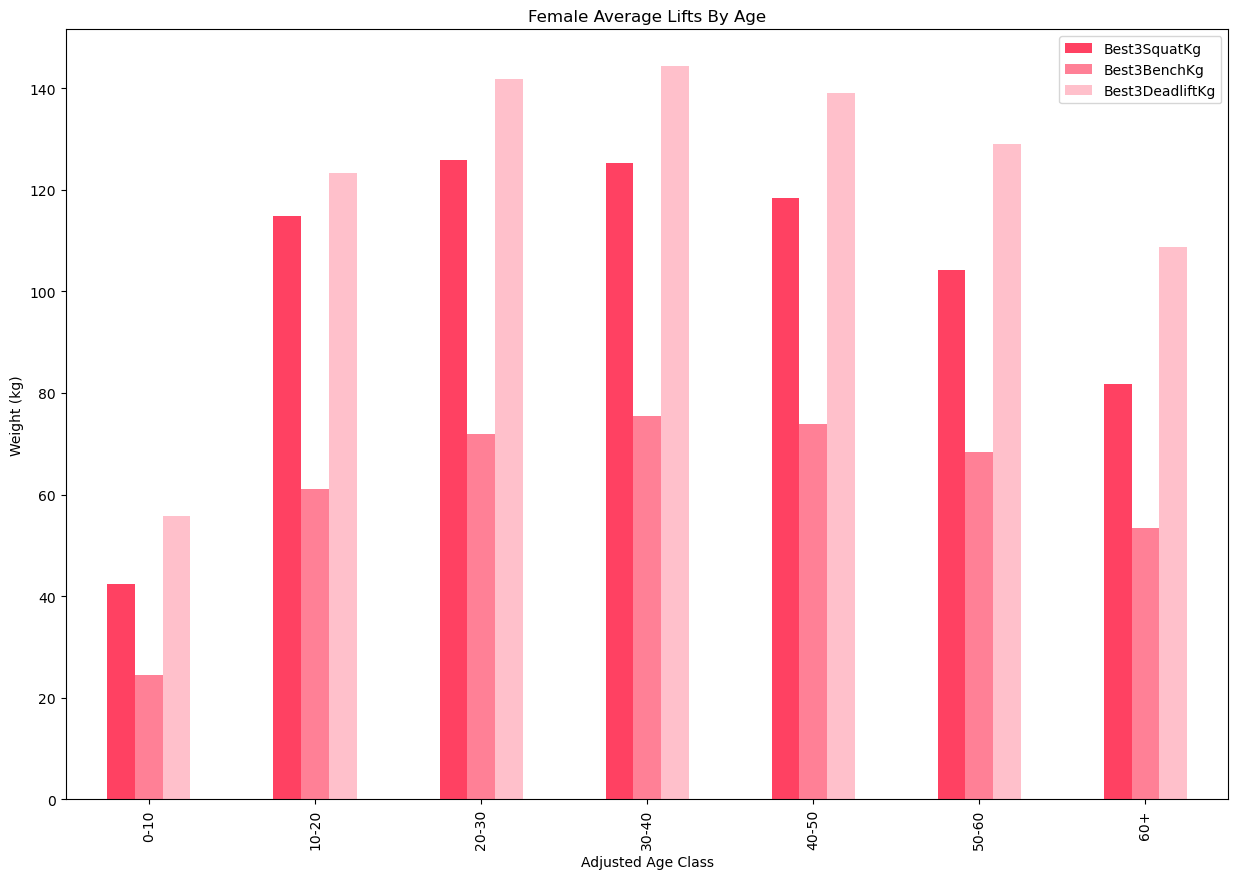

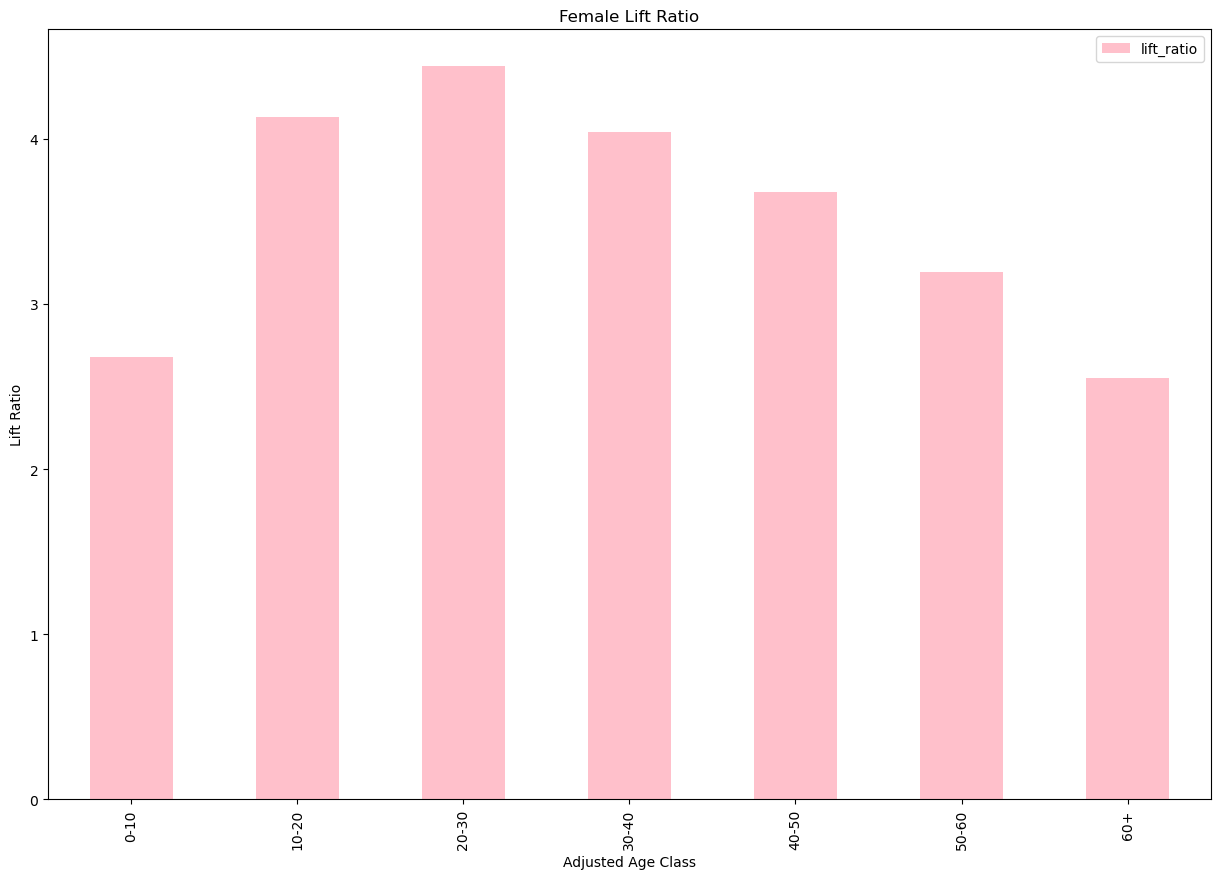

In [34]:
female_best_lifts = pd.DataFrame(female_lifters.groupby('Adjusted Age Class')[['Best3SquatKg','Best3BenchKg','Best3DeadliftKg']].mean().round(2))

female_best_lifts.plot(kind = 'bar', title= 'Female Average Lifts By Age', color = ['#FF4162','#FF8096','#FFC0CB'], figsize = (15,10))
plt.ylabel('Weight (kg)')

lift_ratio_f = pd.DataFrame(female_lifters.groupby('Adjusted Age Class')[['lift_ratio']].mean().round(2))
lift_ratio_f.plot(kind = 'bar', title= 'Female Lift Ratio', figsize = (15,10), color = ['#FFC0CB'])
plt.ylabel('Lift Ratio')


plt.show()

### Male Average Lifts by Age & Lift Ratio

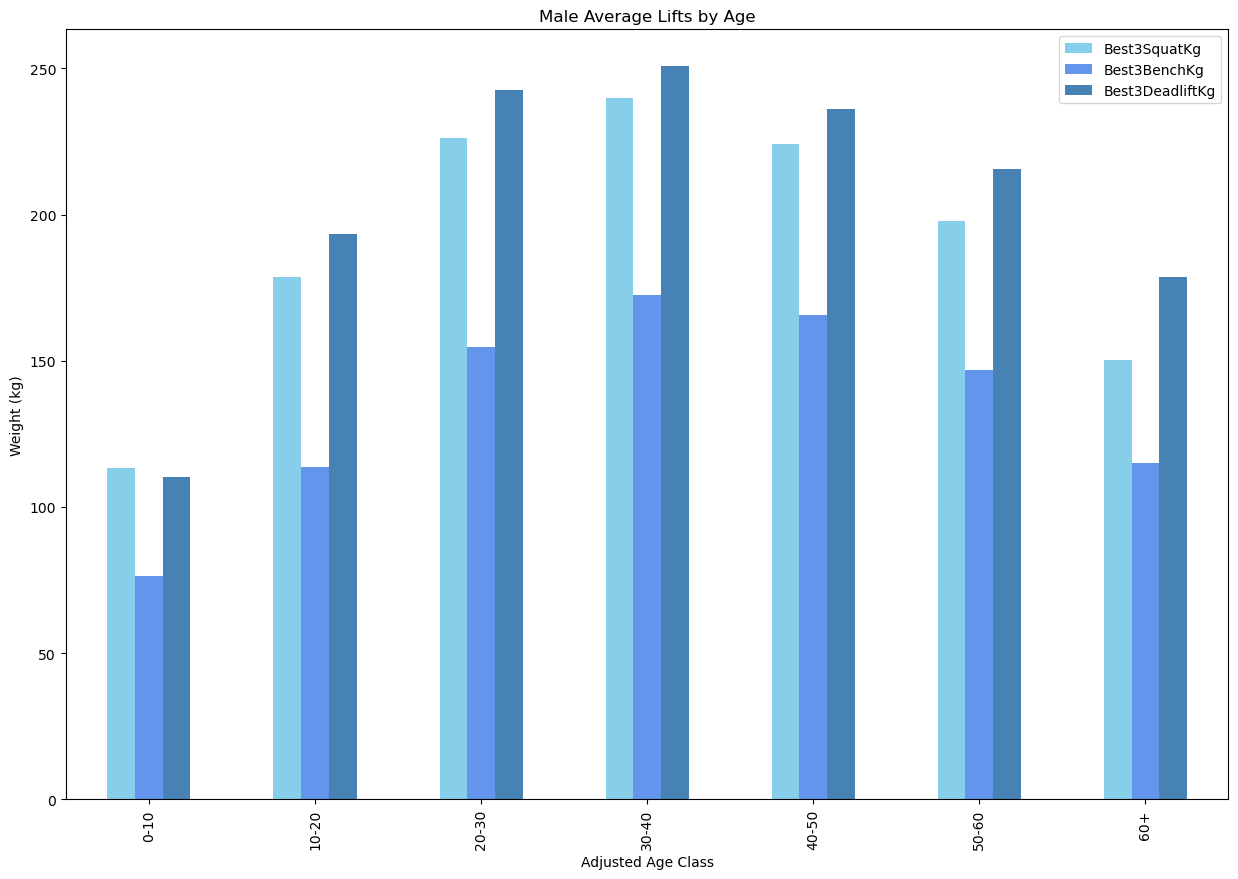

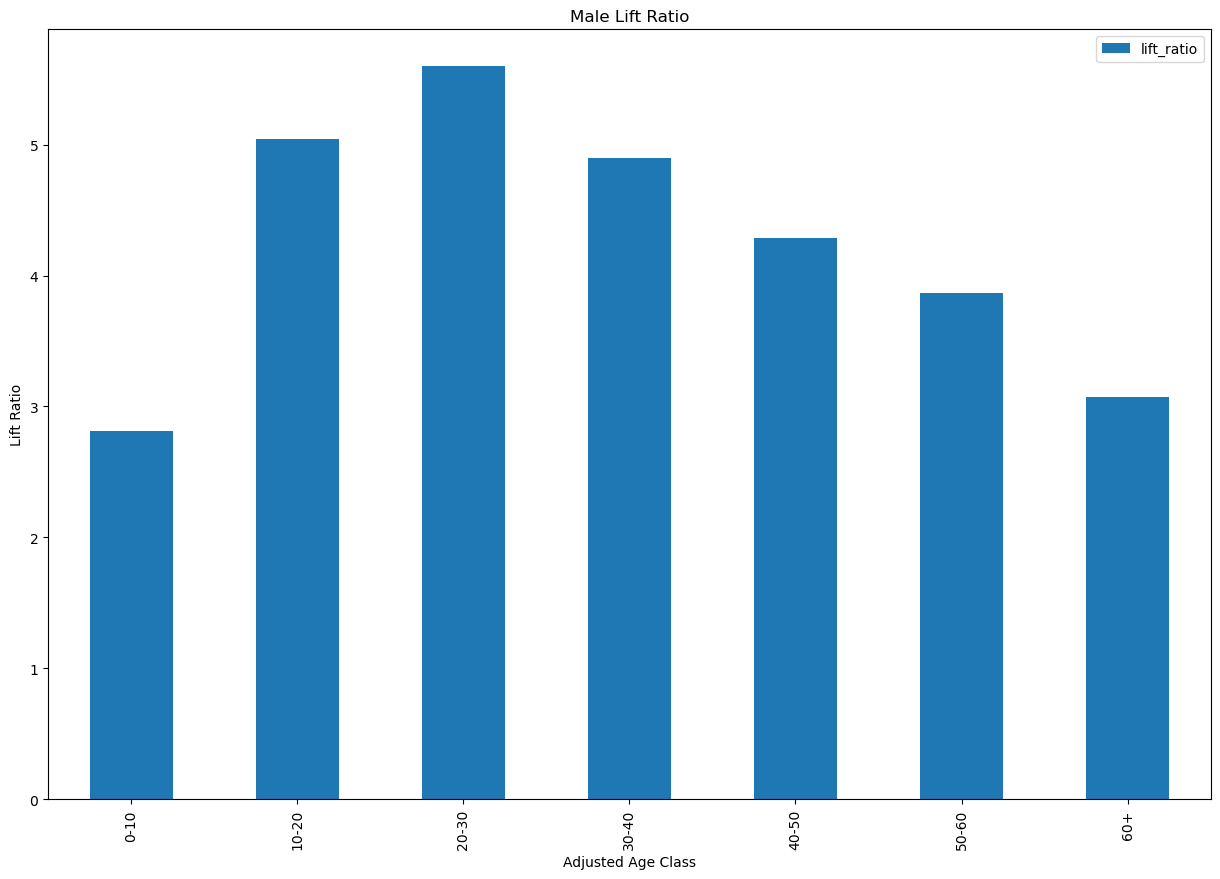

In [35]:
male_best_lifts = pd.DataFrame(male_lifters.groupby('Adjusted Age Class')[['Best3SquatKg','Best3BenchKg','Best3DeadliftKg']].mean().round(2))

male_best_lifts.plot(kind = 'bar', title= 'Male Average Lifts by Age', color = ['#87CEEB','#6495ED','#4682B4'], figsize = (15,10))
plt.ylabel('Weight (kg)')

lift_ratio_m = pd.DataFrame(male_lifters.groupby('Adjusted Age Class')[['lift_ratio']].mean().round(2))
lift_ratio_m.plot(kind = 'bar', title= 'Male Lift Ratio', figsize = (15,10))
plt.ylabel('Lift Ratio')

plt.show()

## Bench, Squat, Deadlift Capacity on Gender

### Seaborn Violin Graphs

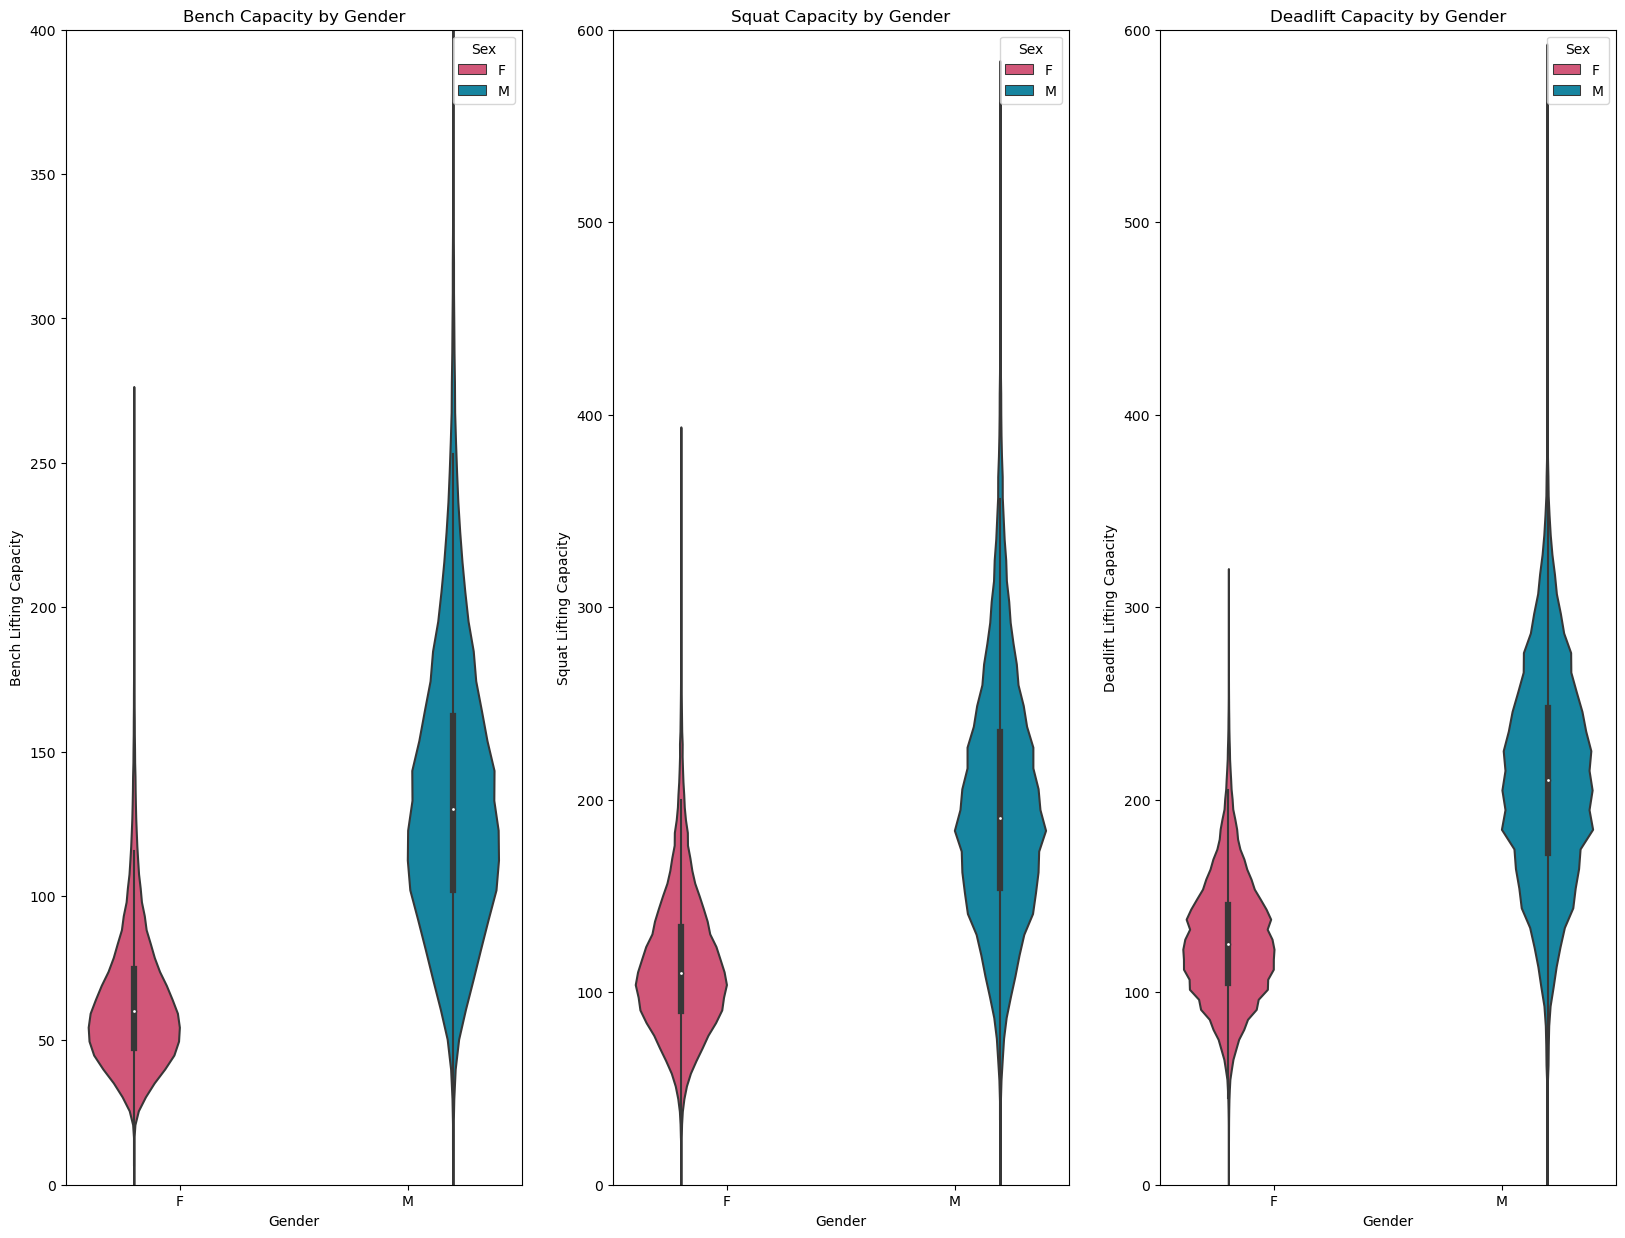

In [36]:
plt.figure (figsize = (20,15))

plt.subplot(1,3,1)
plt.ylim(0,400)
sns.violinplot(x='Sex',y='Best3BenchKg',data= df, hue='Sex',scale = 'count', dodge=True,
palette = ['#e54370','#0093b7'])
plt.style.use("fast")
plt.title('Bench Capacity by Gender')
plt.xlabel('Gender')
plt.ylabel('Bench Lifting Capacity')

plt.subplot(1,3,2)
plt.ylim(0,600)
sns.violinplot(x='Sex',y='Best3SquatKg',data= df, hue='Sex',scale = 'count', dodge=True,
palette = ['#e54370','#0093b7'])
plt.style.use("fast")
plt.title('Squat Capacity by Gender')
plt.xlabel('Gender')
plt.ylabel('Squat Lifting Capacity')

plt.subplot(1,3,3)
plt.ylim(0,600)
sns.violinplot(x='Sex',y='Best3DeadliftKg',data= df, hue='Sex',scale = 'count', dodge=True,
palette = ['#e54370','#0093b7'])
plt.style.use("fast")
plt.title('Deadlift Capacity by Gender')
plt.xlabel('Gender')
plt.ylabel('Deadlift Lifting Capacity')


plt.show()

## Best Lifter

### Female Lifter 

In [37]:
## Best Female Lifter

df.loc[female_lifters['lift_ratio'].idxmax()]

Name                                 Heidi Howar
Sex                                            F
Event                                        SBD
Equipment                              Multi-ply
Age                                         28.5
AgeClass                                   24-34
Division                                    Open
BodyweightKg                               59.24
WeightClassKg                                 60
Squat1Kg                                     NaN
Squat2Kg                                     NaN
Squat3Kg                                     NaN
Squat4Kg                                     NaN
Best3SquatKg                              263.08
Bench1Kg                                     NaN
Bench2Kg                                     NaN
Bench3Kg                                     NaN
Bench4Kg                                     NaN
Best3BenchKg                              179.17
Deadlift1Kg                                  NaN
Deadlift2Kg         

### Male Lifter 

In [44]:
## Best Male Lifter

print(df.loc[male_lifters['lift_ratio'].idxmax()])

Name                  Kalle Räsänen
Sex                               M
Event                           SBD
Equipment                 Multi-ply
Age                            26.0
AgeClass                      24-34
Division                        NaN
BodyweightKg                   82.5
WeightClassKg                  82.5
Squat1Kg                      415.0
Squat2Kg                      435.0
Squat3Kg                      450.0
Squat4Kg                        NaN
Best3SquatKg                  450.0
Bench1Kg                      300.0
Bench2Kg                      310.0
Bench3Kg                     -320.0
Bench4Kg                        NaN
Best3BenchKg                  310.0
Deadlift1Kg                   320.0
Deadlift2Kg                   340.0
Deadlift3Kg                  -361.0
Deadlift4Kg                     NaN
Best3DeadliftKg               340.0
TotalKg                      1100.0
Place                             1
Wilks                         736.9
McCulloch                   